In [2]:
import pandas as pd
df = pd.read_csv('heart_data.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,70,1,4,130,322,0,2,109,0,24,2,3,3,2
1,67,0,3,115,564,0,2,160,0,16,2,0,7,1
2,57,1,2,124,261,0,0,141,0,3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,2,1,1,3,1


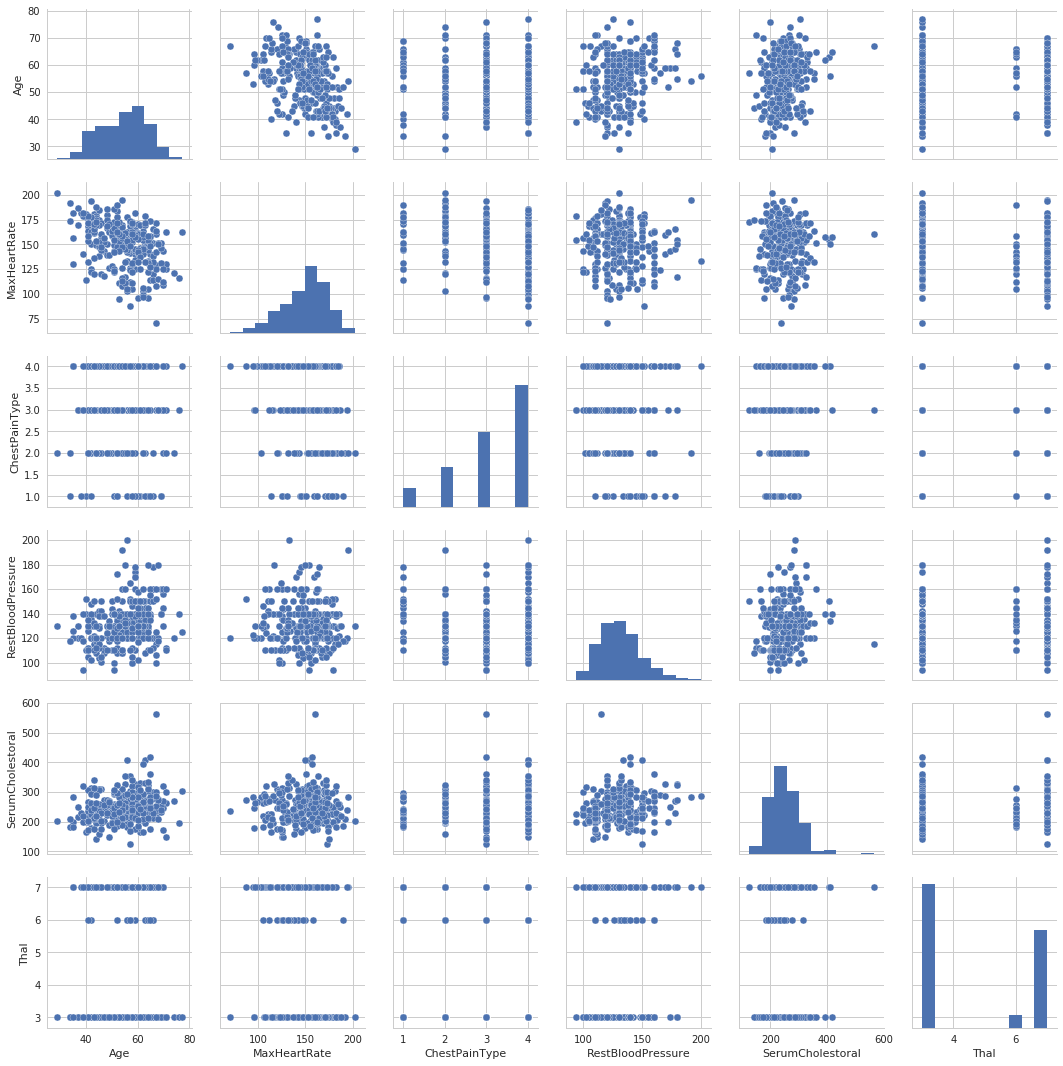

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Age', 'MaxHeartRate', 'ChestPainType', 'RestBloodPressure', 'SerumCholestoral', 'Thal']
sns.pairplot(df[cols],size=2.5)
plt.show()

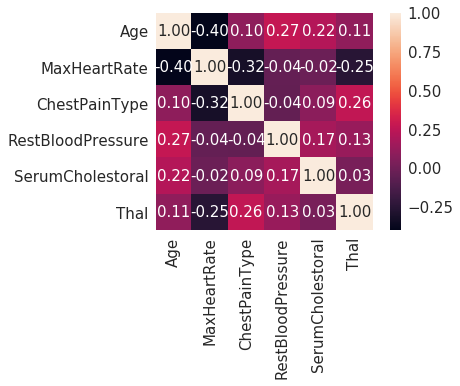

In [5]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [6]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20): 
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:] + self.w_[0])
    
    def predict(self, X):
        return self.net_input(X)

In [7]:
X = df[['Age']].values
y = df['RestBloodPressure'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


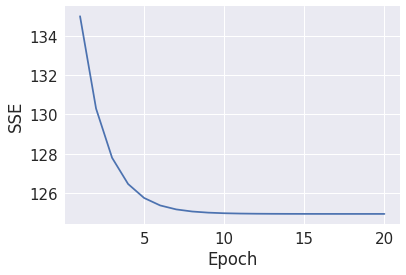

In [8]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

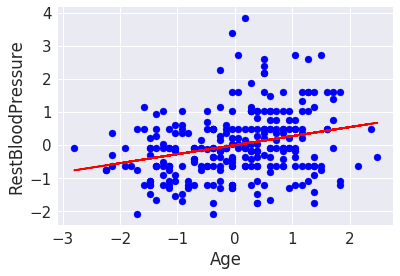

In [10]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Age')
plt.ylabel('RestBloodPressure')
plt.show()

In [11]:
Age_std = sc_x.transform([5.0])
RestBloodPressure_std = lr.predict(Age_std)
print("RestBloodPressure is %.3f" % \
      sc_y.inverse_transform(RestBloodPressure_std))

RestBloodPressure is 104.926


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.273


In [13]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: 0.000


In [14]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])

Slope: 0.535


In [15]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: 102.200


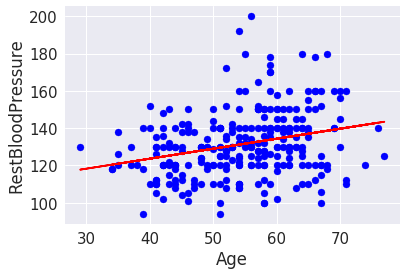

In [16]:
lin_regplot(X, y, slr)
plt.xlabel('Age')
plt.ylabel('RestBloodPressure')
plt.show()

In [17]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X,y)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7f195ae140d0>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

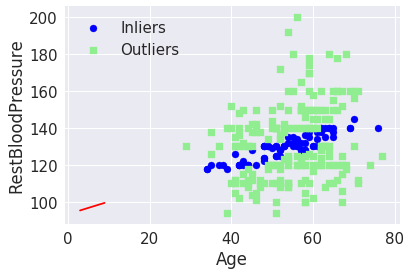

In [18]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Age')
plt.ylabel('RestBloodPressure')
plt.legend(loc='upper left')
plt.show()

In [19]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

Slope: 0.683


In [20]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: 93.348


In [78]:
from sklearn.cross_validation import train_test_split
X = df.values[:,0]
X = X.reshape(270,1)
y = df.values[:,3]
y = y.reshape(270,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

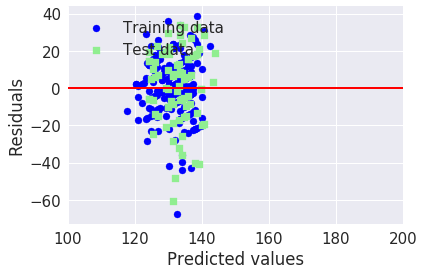

In [79]:
plt.scatter(y_train_pred, y_train_pred - y_train,
c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=100, xmax=200, lw=2, color='red')
plt.xlim([100, 200])
plt.show()